In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

Happiness predictions
Problem Statement
We want to automate the Happiness score  process based on country details t.

Steps:
1-Hypothesis Generation 
2-Data Exploration 
3-Data cleaning
4-Model building

1-Hypothesis Generation:
    Which countries are more likly to be happy
    1- the country that has high GDP
    2- the country high freedom to do life choices
    3- the country that has high healthy life

2-Data Exploration 

In [3]:
df= pd.read_csv('2018.csv')
df.sample(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
22,23,France,6.489,1.293,1.466,0.908,0.520,0.098,0.176
11,12,Austria,7.139,1.341,1.504,0.891,0.617,0.242,0.224
102,103,Gabon,4.758,1.036,1.164,0.404,0.356,0.032,0.052
118,119,Namibia,4.441,0.874,1.281,0.365,0.519,0.051,0.064
19,20,United Arab Emirates,6.774,2.096,0.776,0.670,0.284,0.186,0.182
62,63,Estonia,5.739,1.200,1.532,0.737,0.553,0.086,0.174
123,124,Kenya,4.410,0.493,1.048,0.454,0.504,0.352,0.055
35,36,Spain,6.310,1.251,1.538,0.965,0.449,0.142,0.074
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
89,90,Jordan,5.161,0.822,1.265,0.645,0.468,0.130,0.134


3-Data cleaning

In [ ]:
df.isnull().sum() #checking for null values

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [ ]:
df.shape # inspecting shape of dataset

In [ ]:
df.info() # checking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112449
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096343
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.139000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [ ]:
correlation=df.corr(numeric_only=True)
correlation

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.991749,-0.805897,-0.737500,-0.778700,-0.530786,-0.103602,-0.374552
Score,-0.991749,1.000000,0.802124,0.745760,0.775814,0.544280,0.135825,0.408405
GDP per capita,-0.805897,0.802124,1.000000,0.672080,0.844273,0.332275,-0.011241,0.323508
Social support,-0.737500,0.745760,0.672080,1.000000,0.667288,0.411087,0.018226,0.209731
Healthy life expectancy,-0.778700,0.775814,0.844273,0.667288,1.000000,0.355475,0.020751,0.316322
Freedom to make life choices,-0.530786,0.544280,0.332275,0.411087,0.355475,1.000000,0.297988,0.455087
Generosity,-0.103602,0.135825,-0.011241,0.018226,0.020751,0.297988,1.000000,0.361870
Perceptions of corruption,-0.374552,0.408405,0.323508,0.209731,0.316322,0.455087,0.361870,1.000000


<Axes: >

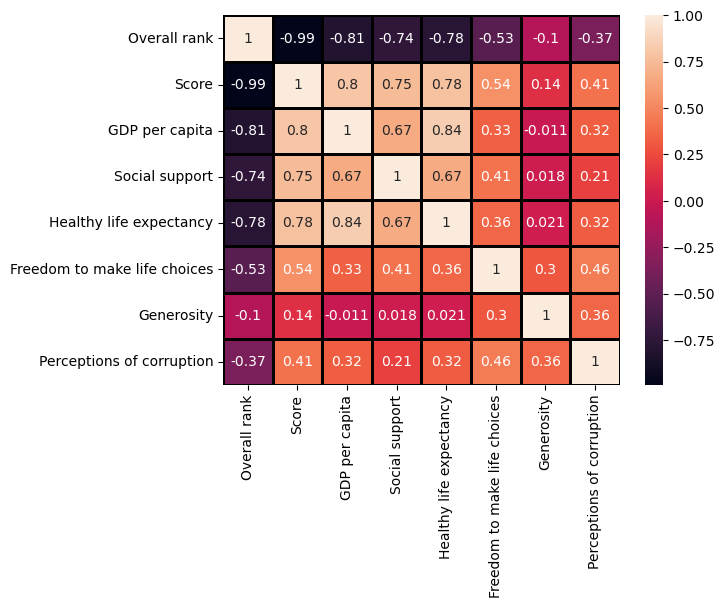

In [ ]:
# heatmap to see correlation between between columns
sns.heatmap(correlation, linewidths=2,linecolor='k', annot=True)

In [ ]:
#Distribution analysis

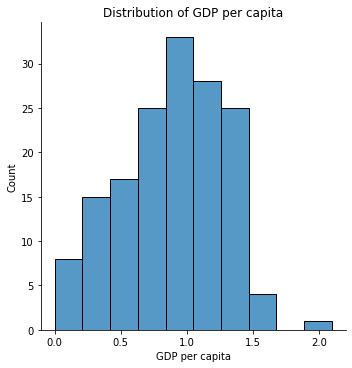

In [6]:
import matplotlib.pyplot as plt

# create a distribution plot for GDP per capita
sns.displot(df['GDP per capita'])
plt.title('Distribution of GDP per capita')
plt.show()

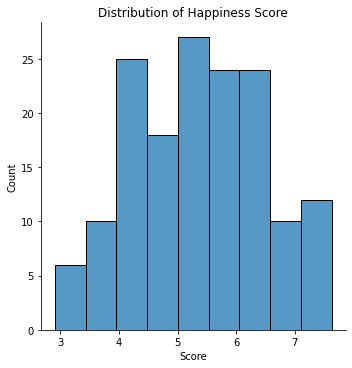

In [7]:
# create a distribution plot for Score
sns.displot(df['Score'])
plt.title('Distribution of Happiness Score')
plt.show()

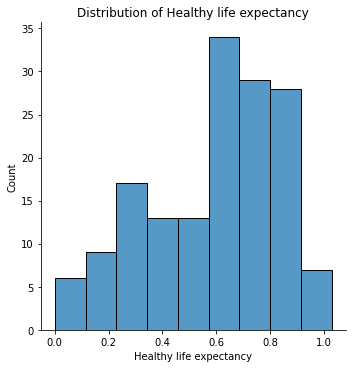

In [8]:
# create a distribution plot for Healthy life expectancy
sns.displot(df['Healthy life expectancy'])
plt.title('Distribution of Healthy life expectancy')
plt.show()

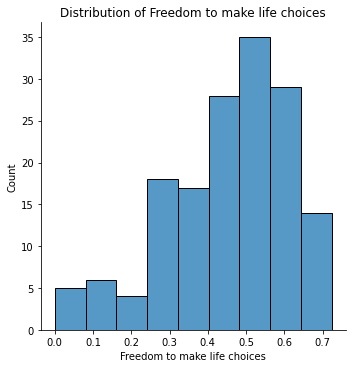

In [9]:
# create a distribution plot for Freedom to make life choices
sns.displot(df['Freedom to make life choices'])
plt.title('Distribution of Freedom to make life choices')
plt.show()

to understand the outliers in distributions we will create box plot :

c:\Users\administrateur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


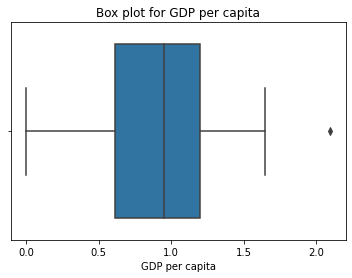

In [10]:
# create a box plot for GDP per capita
sns.boxplot(df['GDP per capita'])
plt.title('Box plot for GDP per capita')
plt.show()

c:\Users\administrateur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


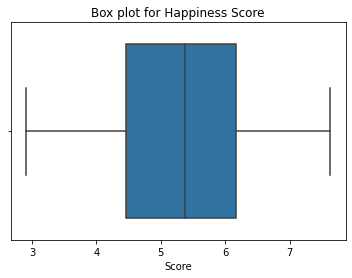

In [11]:
sns.boxplot(df['Score'])
plt.title('Box plot for Happiness Score')
plt.show()

c:\Users\administrateur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


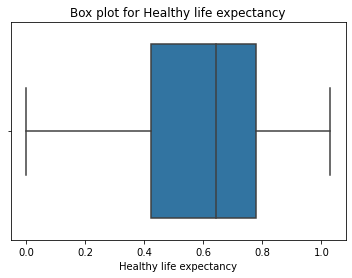

In [12]:
sns.boxplot(df['Healthy life expectancy'])
plt.title('Box plot for Healthy life expectancy')
plt.show()

c:\Users\administrateur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


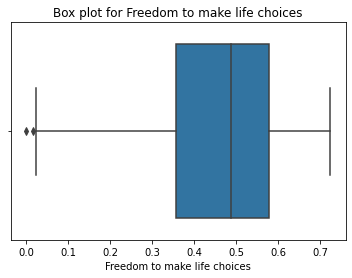

In [13]:
sns.boxplot(df['Freedom to make life choices'])
plt.title('Box plot for Freedom to make life choices')
plt.show()

the distribution of score as happiness indicator by GDP per capita ,Healthy life expectancy and Freedom to make life choices

c:\Users\administrateur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


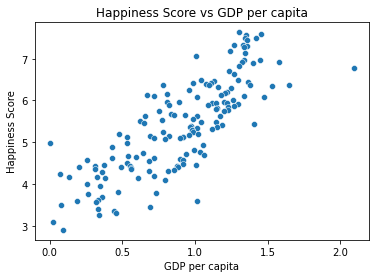

In [15]:
# create a scatter plot for Score vs GDP per capita
sns.scatterplot(df['GDP per capita'],df['Score'])
plt.title('Happiness Score vs GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')
plt.show()

c:\Users\administrateur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


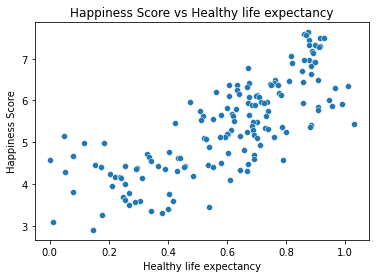

In [16]:
# create a scatter plot for Score vs Healthy life expectancy
sns.scatterplot(df['Healthy life expectancy'], df['Score'])
plt.title('Happiness Score vs Healthy life expectancy')
plt.xlabel('Healthy life expectancy')
plt.ylabel('Happiness Score')
plt.show()

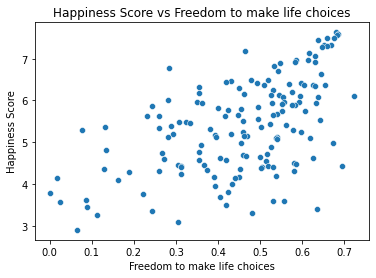

In [17]:
# create a scatter plot for Score vs Freedom to make life choices
sns.scatterplot(x=df['Freedom to make life choices'], y=df['Score'])
plt.title('Happiness Score vs Freedom to make life choices')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')
plt.show()

# for 'happy' countries (Score above the median) and for 'not happy' countries (Score below the median).

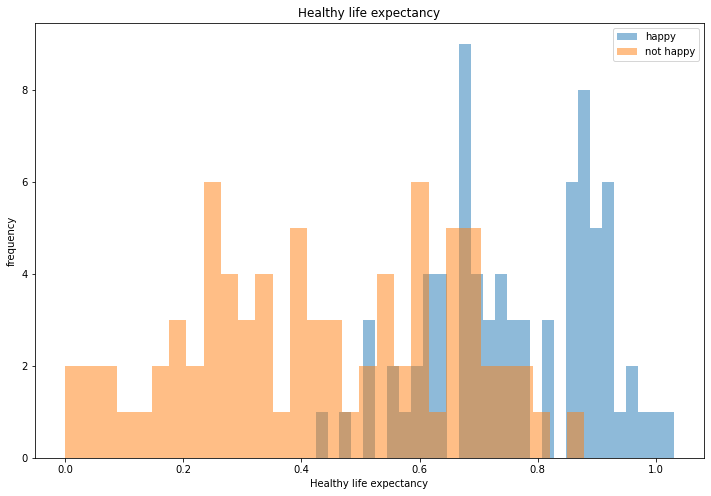

In [19]:
# create a new binary 'happy' column
median_score = df['Score'].median()
df['happy'] = df['Score'] > median_score

fig, ax = plt.subplots(figsize=(12,8))

# feature is GDP per capita 
feature = 'Healthy life expectancy'

bins = 30

ax.hist(df.loc[df['happy'] == True, feature].dropna(), 
        bins=bins, label='happy', alpha=0.5)
ax.hist(df.loc[df['happy'] == False, feature].dropna(), 
        bins=bins, label='not happy', alpha=0.5)
ax.set_title(feature)
ax.set_ylabel('frequency')
ax.set_xlabel(feature)
ax.legend()

plt.show()


from this graphe we can understand that other factors might be influencing happiness scores
we have to look for other variant to understand more. 
for that we will go for multivariate analysis 

 multivariate analysis 
 method = multivariate regression analysis : In this analysis, we can consider 'Score' as dependent variable and all other variables (GDP per capita, Healthy life expectancy, etc.) as independent variables.

In [20]:
import statsmodels.api as sm

# define independent variables
X = df[['GDP per capita', 'Social support', 'Healthy life expectancy', 
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]


# we need to add constant to the independent variables matrix  because statsmodels' regressions do not include an intercept by default
X = sm.add_constant(X)

# define scor as dependent variable
y = df['Score']

# fit the model
model = sm.OLS(y, X)
results = model.fit()

# print the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     93.15
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           6.90e-48
Time:                        07:39:08   Log-Likelihood:                -116.91
No. Observations:                 156   AIC:                             247.8
Df Residuals:                     149   BIC:                             269.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Generosity and Perceptions of corruption have p-values above 0.05, which suggests that these predictors are not statistically significant. 
we will go for more specific summary


In [21]:
import statsmodels.api as sm

# define independent variables
X = df[['GDP per capita','Healthy life expectancy', 
        'Freedom to make life choices', ]]


# we need to add constant to the independent variables matrix  because statsmodels' regressions do not include an intercept by default
X = sm.add_constant(X)

# define scor as dependent variable
y = df['Score']

# fit the model
model = sm.OLS(y, X)
results = model.fit()

# print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     152.2
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.39e-45
Time:                        07:41:12   Log-Likelihood:                -130.25
No. Observations:                 156   AIC:                             268.5
Df Residuals:                     152   BIC:                             280.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

 
 Summary comments:
The second model = is preferred for its simplicity and because all its predictors are statistically significant,
p-value = (GDP per capita, Healthy life expectancy, Freedom to make life choices) have p-values less than 0.05, means they are statistically significant predictors of happiness score.
Adjusted R-squared = this model explains 74.5% of the variance in the happiness score.


3-Building a Predictive Model 

 Since we are predicting a continuous variable (happiness score), so this is a regression problem. 
 Possible model will be linear regression or decision trees.
 
 #Goal: predict the happiness score based on various indicators like GDP per capita, healthy life expectancy, freedom to    make life choices
 #Data preprocessing : cleaning data(done), handling missing values(NA), scaling numerical variables(not strictly necessary, but it won't hurt and it's good practice.) We'll use StandardScaler from sklearn which standardizes features by removing the mean and scaling to unit variance.
 #Model : linear regression.
 #Evaluate model: R-squared value.


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# features and target variable
features = df[['GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices']]
target = df['Score']

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean squared error: ', mse)
print('R-squared: ', r2)

Mean squared error:  0.3215400016926054
R-squared:  0.689516185935062


Summary :0.6895 indicates that about 68.95% of the variance in the happiness score is predictable from the features (GDP per capita, healthy life expectancy, and freedom to make life choices).    

C:\Users\administrateur\AppData\Local\Temp\ipykernel_20304\900887865.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='red')


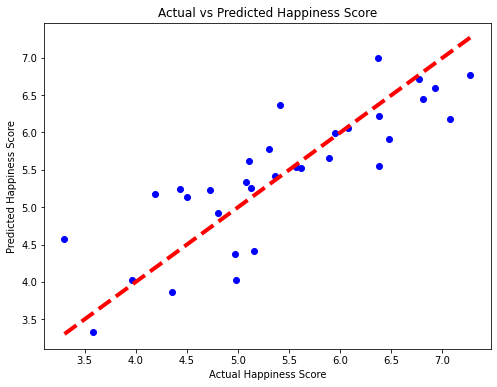

In [28]:
import matplotlib.pyplot as plt

# Create a scatter plot with a linear line
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='red')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted Happiness Score')
plt.show()

Comment : 
  straight line represents a perfect prediction.
  Any closer points to this line represent better model's predictions.
  Any blue points that are not on the red line represent errors in the model's predictions.

At the end We will create a data frame to show which countries were well predicted by the model along with the actual score, the predicted score from the model, and the absolute error between them. The countries are sorted by absolute error in ascending order, so countries at the top were predicted more accurately than those at the bottom.

In [30]:
# Include 'Country or region' in features 
features = df[['Country or region', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices']]

# Split the data to test and train
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# keep 'Country or region' info
X_test_with_countries = X_test.copy()

# Remove 'Country or region' from X_train and X_test before fitting the model
X_train = X_train.drop(columns=['Country or region'])
X_test = X_test.drop(columns=['Country or region'])

# Create and train your model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Create a dataframe that pairs up 'Country or region', actual scores and predicted scores
results_df = X_test_with_countries[['Country or region']].copy()
results_df['Actual Score'] = y_test
results_df['Predicted Score'] = predictions
results_df['Absolute Error'] = abs(results_df['Actual Score'] - results_df['Predicted Score'])

# sort countries by well predicted (lower absolute error means better prediction)
sorted_results_df = results_df.sort_values(by='Absolute Error')

print(sorted_results_df)


        Country or region  Actual Score  Predicted Score  Absolute Error
45               Thailand         6.072         6.062975        0.009025
69                  Libya         5.566         5.531528        0.034472
51                Romania         5.945         5.994673        0.049673
19   United Arab Emirates         6.774         6.720339        0.053661
78                 Greece         5.358         5.420017        0.062017
139                Guinea         3.964         4.027762        0.063762
68                Hungary         5.620         5.518464        0.101536
101             Venezuela         4.806         4.928305        0.122305
93               Mongolia         5.125         5.256286        0.131286
30                Uruguay         6.379         6.222891        0.156109
55                Jamaica         5.890         5.654622        0.235378
147                 Haiti         3.582         3.325460        0.256540
96                 Bhutan         5.082         5.3

Business Decisions :
  ==>For the countries with the low prediction error :
  #Policy Validation: The low prediction error indicates that the three factors selected for this model (GDP per capita, healthy life expectancy, and freedom to make life choices) are reliable predictors of happiness in this countries. Policies that aim to increase these factors are likely to have a positive effect on the overall happiness of the population.

  #Business Decisions: Businesses considering investing into this countries can feel confident that the stability and predictability suggested by this model bode well for a stable economic and social environment. 

  ==>For the country with the high prediction error:
  #Policy Modification: A high prediction error suggests that the model factors may not be the most significant predictors of happiness in this country. -other factors are influencing happiness-. 
  
  #Research: More research would be beneficial to understand what other factors might be contributing to happiness in this country. 
  
  #Business Decisions: For businesses, a high error country may represent a higher risk for investments. More research would be required to understand the market dynamics.

